In [1]:
# Exploratory Data Analysis (EDA) for a CSV file
# subgerente.puerto@lachao.mx
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configure visualizations
%matplotlib inline
sns.set(style="whitegrid")

# Load the CSV file (update the path with your file)
file_path = './../cartera/06cartera2025.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

In [5]:
# Display basic information
df.shape  # Number of rows and columns
df.info()  # Data types and non-null values
df.head()  # First five rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 37 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Nombre del Acreditado                                    3678 non-null   object 
 1   NUMERO DE SOCIO                                          3678 non-null   float64
 2   NUM_CREDITO                                              3678 non-null   object 
 3   SUCURSAL                                                 3678 non-null   object 
 4   CLASIFICACION DEL CREDITO                                3678 non-null   object 
 5   PRODUCTO DE CREDITO                                      3678 non-null   object 
 6   MODALIDAD DE PAGO                                        3678 non-null   object 
 7   FECHA DE OTORGAMIENTO                                    3678 non-null   object 
 8   MONTO ORIGINAL              

,Nombre del Acreditado,NUMERO DE SOCIO,NUM_CREDITO,SUCURSAL,CLASIFICACION DEL CREDITO,PRODUCTO DE CREDITO,MODALIDAD DE PAGO,FECHA DE OTORGAMIENTO,MONTO ORIGINAL,FECHA DE VENCIMIENTO,...,Emproblemado,VIGENTE O VENCIDO,CARGO DEL ACREDITADO PARTE RELACIONADA art. 26 LRASCAP,Monto Garantia,CUENTA(S) SOBRE LA(S) QUE SE CONSITUYO GARANTIA LIQUIDA,MONTO GARANTIA PRENDARIA,MONTO GARANTIA HIPOTECARIA,EPRC PARA PARTE CUBIERTA,EPRC PARA PARTE EXPUESTA,EPRC X INTERESES DE CaVe
0,MARCO ANTONIO ROBLES VARGAS,300001016.0,17137-0,PUERTO ESCONDIDO,COMERCIAL,CREDI-AUTO LACHAO,PRINCIPAL NIVELADO,27/11/2024,"449,650.00",27/09/2029,...,NaN,VIGENTE,NaN,0.00,NaN,NaN,NaN,0.00,"2,041.26",0.00
1,MARIA ISABEL RAMIREZ OLIVERA,300000447.0,16339-0,PUERTO ESCONDIDO,CONSUMO,CREDI-AUTO LACHAO,PRINCIPAL NIVELADO,26/09/2023,"282,900.00",26/09/2028,...,NaN,VIGENTE,NaN,0.00,NaN,NaN,NaN,0.00,"1,909.09",0.00
2,JESUS MEDINA CORTES,300006000.0,16489-0,PUERTO ESCONDIDO,CONSUMO,CREDI-AUTO LACHAO,PRINCIPAL NIVELADO,28/11/2023,"230,900.00",20/11/2028,...,NaN,VIGENTE,NaN,0.00,NaN,NaN,NaN,0.00,"1,584.97",0.00
3,ZITO CANSECO SANCHEZ,300000357.0,17280-0,PUERTO ESCONDIDO,CONSUMO,CREDI-AUTO LACHAO,PRINCIPAL NIVELADO,28/02/2025,"461,506.75",27/02/2027,...,NaN,VIGENTE,NaN,0.00,NaN,NaN,NaN,0.00,"4,089.44",0.00
4,FORTINO LUIS MARTINEZ,300013206.0,16267-0,PUERTO ESCONDIDO,CONSUMO,CREDI-AUTO LACHAO,PRINCIPAL NIVELADO,15/08/2023,"341,142.77",15/08/2028,...,NaN,VIGENTE,NaN,0.00,NaN,NaN,NaN,0.00,"2,170.37",0.00


In [7]:
columnas = df.columns
columnas

Index(['Nombre del Acreditado', 'NUMERO DE SOCIO', 'NUM_CREDITO', 'SUCURSAL',
       'CLASIFICACION DEL CREDITO', 'PRODUCTO DE CREDITO', 'MODALIDAD DE PAGO',
       'FECHA DE OTORGAMIENTO', 'MONTO ORIGINAL', 'FECHA DE VENCIMIENTO',
       'TASA ORDINARIA NOMINAL ANUAL%', 'TASA MORATORIA NOMINAL ANUAL%',
       'PLAZO DEL CREDITO (meses)', 'FRECUENCIA DE PAGO CAPITAL',
       'FRECUENCIA DE PAGO INTERESES', 'DIAS DE MORA CARTERA ',
       'CAPITAL VIGENTE', 'CAPITAL VENCIDO',
       'INTERESES DEVENGADOS NO COBRADOS VIGENTE',
       'INTERESES DEVENGADOS NO COBRADOS VENCIDO',
       'INTERESES DEVENGADOS NO COBRADOS CUENTAS DE ORDEN',
       'estimacion ordenada cnbv', 'FECHA ULTIMO PAGO CAPITAL',
       'MONTO ULTIMO PAGO CAPITAL', 'FECHA ULTIMO PAGO INTERESES',
       'MONTO ULTIMO PAGO INTERESES', 'RENOVADO, REESTRUCTURADO O NORMAL',
       'Emproblemado', 'VIGENTE O VENCIDO',
       'CARGO DEL ACREDITADO PARTE RELACIONADA art. 26 LRASCAP',
       'Monto Garantia ',
       'CUENTA(S)

## Contrucción de agrupamientos para el análisis de los datos

In [ ]:
# Contar cuántos créditos hay por estado de crédito
creditosporestado = df.groupby('VIGENTE O VENCIDO')['VIGENTE O VENCIDO'].count()
print("\nNúmero de créditos por estado de crédito:")
print(creditosporestado)


Número de créditos por estado de crédito:
VIGENTE O VENCIDO
VENCIDO      88
VIGENTE    3590
Name: VIGENTE O VENCIDO, dtype: int64


In [19]:
# Contar cuántos créditos hay por estado de crédito y por producto de cpredito
estadoproductocredito = df.groupby(['VIGENTE O VENCIDO', 'PRODUCTO DE CREDITO'])['VIGENTE O VENCIDO'].count()
# Convertir a DataFrame para graficar
estadoproductocredito_df = estadoproductocredito.reset_index(name='Cantidad')
#print(estadoproductocredito_df)

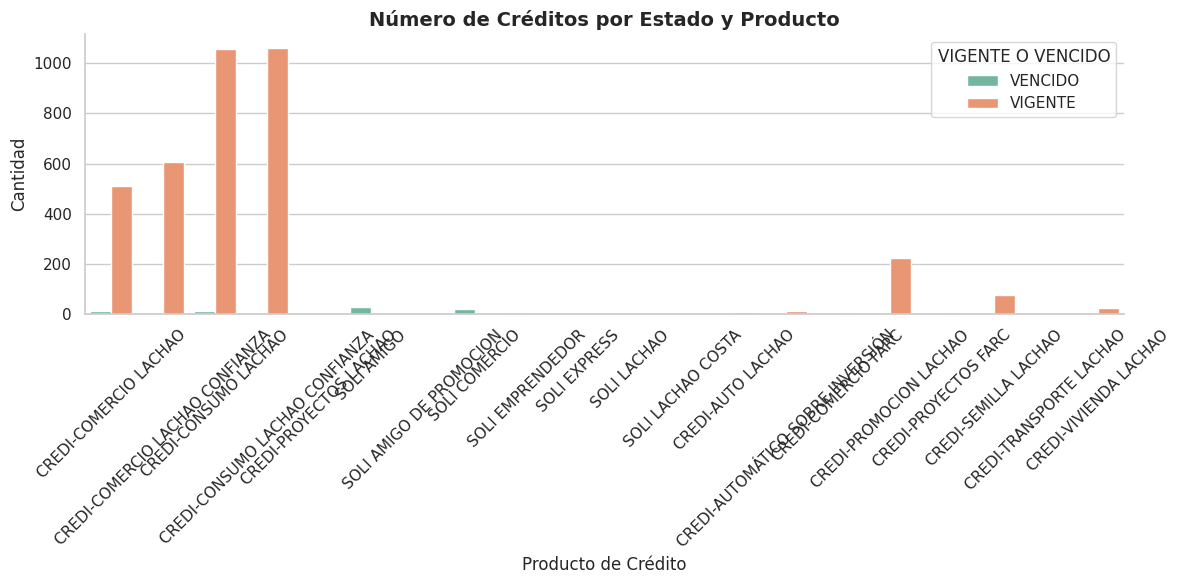

In [21]:
# Gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(
    data=estadoproductocredito_df,
    x='PRODUCTO DE CREDITO',
    y='Cantidad',
    hue='VIGENTE O VENCIDO',
    palette='Set2'
)

plt.title('Número de Créditos por Estado y Producto', fontsize=14, fontweight='bold')
plt.xlabel('Producto de Crédito', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

   VIGENTE O VENCIDO              PRODUCTO DE CREDITO  Cantidad
5            VENCIDO                       SOLI AMIGO        27
7            VENCIDO                    SOLI COMERCIO        20
2            VENCIDO             CREDI-CONSUMO LACHAO        14
0            VENCIDO            CREDI-COMERCIO LACHAO        12
8            VENCIDO                 SOLI EMPRENDEDOR         3
1            VENCIDO  CREDI-COMERCIO LACHAO CONFIANZA         3
3            VENCIDO   CREDI-CONSUMO LACHAO CONFIANZA         2
6            VENCIDO          SOLI AMIGO DE PROMOCION         2
11           VENCIDO                SOLI LACHAO COSTA         2
4            VENCIDO           CREDI-PROYECTOS LACHAO         1
9            VENCIDO                     SOLI EXPRESS         1
10           VENCIDO                      SOLI LACHAO         1


/tmp/ipykernel_52459/752903348.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


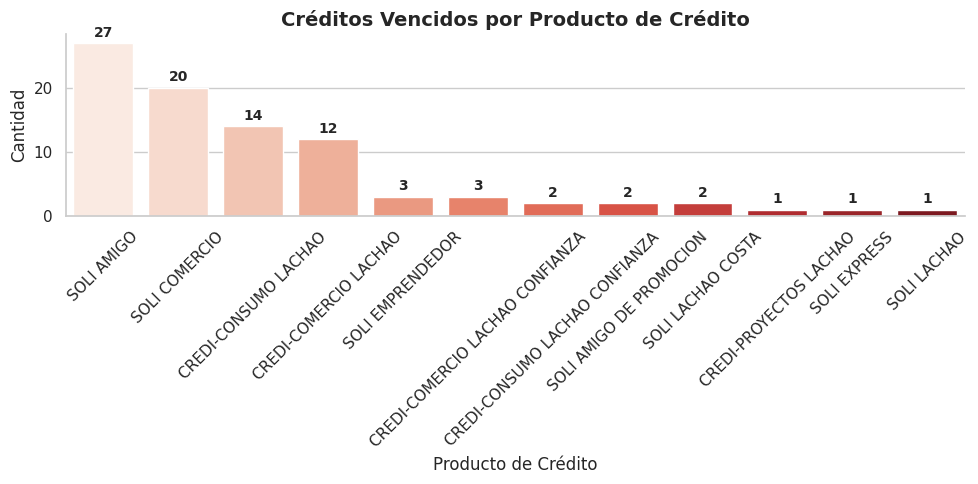

In [28]:
# Filtrar solo los vencidos
# Filtrar solo los vencidos y ordenar de mayor a menor
vencidos_df = estadoproductocredito_df[estadoproductocredito_df['VIGENTE O VENCIDO'] == 'VENCIDO']
vencidos_df = vencidos_df.sort_values(by='Cantidad', ascending=False)
print(vencidos_df)

# Gráfica de barras solo para créditos vencidos
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.barplot(
    data=vencidos_df,
    x='PRODUCTO DE CREDITO',
    y='Cantidad',
    palette='Reds'
)

# Etiquetas de valor sobre cada barra
for i, row in enumerate(vencidos_df.itertuples()):
    plt.text(i, row.Cantidad + 1, str(row.Cantidad), ha='center', fontsize=10, fontweight='bold')

plt.title('Créditos Vencidos por Producto de Crédito', fontsize=14, fontweight='bold')
plt.xlabel('Producto de Crédito', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()


/tmp/ipykernel_52459/4126987569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=palette)
/tmp/ipykernel_52459/4126987569.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=palette)


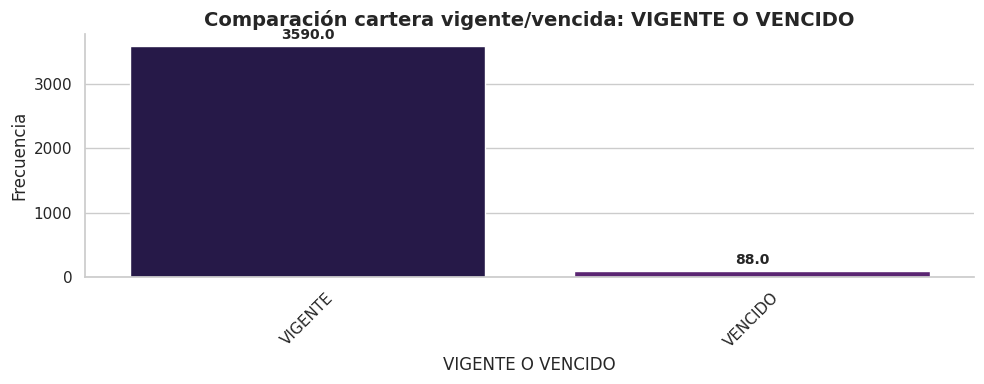

In [10]:
col = 'VIGENTE O VENCIDO'

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # estilo visual limpio

# Paleta de colores atractiva
palette = sns.color_palette("magma", as_cmap=False)

# Crear gráfico de barras
ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=palette)

# Título y etiquetas
plt.title(f'Comparación cartera vigente/vencida: {col}', fontsize=14, fontweight='bold')
plt.xlabel(col, fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)

# Etiquetas numéricas sobre cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  # desplazamiento en pixeles
                textcoords='offset points',
                ha='center', fontsize=10, fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()

/tmp/ipykernel_52459/1591058029.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=palette)
/tmp/ipykernel_52459/1591058029.py:13: UserWarning: 
The palette list has fewer values (6) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=palette)


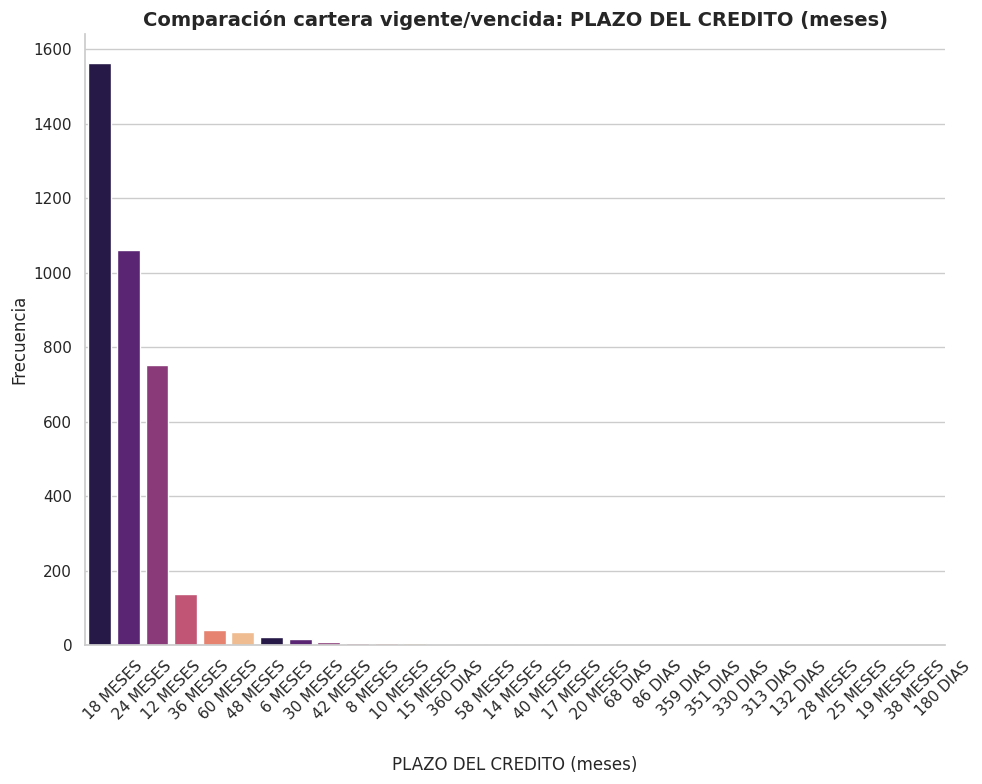

In [9]:


col = 'PLAZO DEL CREDITO (meses)'
# Paleta de colores personalizada
colors = sns.color_palette("viridis", len(df[col].unique()))


plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")  # estilo visual limpio y profesional

# Paleta de colores atractiva
palette = sns.color_palette("magma", as_cmap=False)

# Conteo de la columna con orden descendente
sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=palette)

# Título y etiquetas
plt.title(f'Comparación cartera vigente/vencida: {col}', fontsize=14, fontweight='bold')
plt.xlabel(col, fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)

# Mejoras visuales
sns.despine()
plt.tight_layout()
plt.show()